In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
import os, sys, types
if "import_ipynb" not in sys.modules:
    !pip install import-ipynb
import import_ipynb
sys.path.append(os.getcwd()+"\service")
from service import rethinkDBservice as rethinkDBservice

In [7]:
users = list(rethinkDBservice.getUsersCursors())
table=[]
etiquettes = []
# cmp = 0
for user in users:
    table.append([
        user["accountAge(days)"],
        user["agressivite"],
        user["avg_hashtag"],
        user["avg_url"],
        user["mediumLength"],
        user["rationFollowersFriends"],
        user["tweet_per_day"],
        user["verified"],
        user["visibility"]
    ])
    etiquettes.append(user["suspect"])
    # cmp+=1
    # print(cmp)

KeyboardInterrupt: 

In [ ]:
matriceDonnees = np.array(table)
# print(matriceDonnees)

In [ ]:
attribut = np.array(["accountAge", "agressivite", "avg_hashtag", "avg_url", "mediumLength", "rationFollowersFriends", "tweet_per_day", "verified", "visibility"])

ACP pour afficher graphique en coude pour choix du nombre de CP

In [ ]:
sc = StandardScaler()
Z = sc.fit_transform(matriceDonnees)

In [ ]:
acp = PCA(svd_solver='full')

calculs des composantes principales

In [ ]:
composante_princ = acp.fit_transform(Z)
# print(composante_princ[0])
# nombre de composantes calculÃ©es
# print(acp.n_components_) 

valeur corrigÃ©e par les valeurs singuliÃ¨res

In [ ]:
n=Z.shape[0]
eigval = acp.singular_values_**2/n

plt.plot(np.arange(1,9+1),eigval)<br>
plt.title("Scree plot")<br>
plt.ylabel("Eigen values")<br>
plt.xlabel("Factor number")<br>
plt.show()

=============================================================== #<br>
      ANALYSE ACP - inertie et contribution des attributs       #<br>
=============================================================== #

===================== Introduction ===================== #<br>
cette analyse plus approfondi n'utilise pas la bibliothÃ¨que sklearn mais un TD rÃ©alisÃ© dans le cadre de l'UE IF29<br>
cette analyse permet de mettre en Ã©vidence le choix du nombre de CP et les attributs contribuant Ã  la formation des axes

===================== Baricentre et inertie ===================== #<br>
imension

In [ ]:
dimMatrice=matriceDonnees.shape
# print(dimMatrice)

alcul du baricentre g

In [ ]:
g=np.zeros((1,dimMatrice[1]))
for j in range(dimMatrice[1]):
    g[0,j]=np.mean(matriceDonnees[:,j])
# print(g)

alcul de l'inertie

In [ ]:
I=0
for i in range(dimMatrice[0]):
    I= I + np.sum((matriceDonnees[i,:]-g)*(matriceDonnees[i,:]-g))
I = I/dimMatrice[0]
# print(I)

===================== Centrer-rÃ©duire les donnÃ©es ===================== #<br>
atrice de valeurs centrÃ©es

In [ ]:
Y=np.zeros(dimMatrice)
for j in range(dimMatrice[1]):
    Y[:,j]= matriceDonnees[:,j] - np.mean(matriceDonnees[:,j])
# print(Y)

alcul de gy

In [ ]:
gy=np.zeros((1,dimMatrice[1]))
for j in range(dimMatrice[1]):
    gy[0,j] = np.mean(Y[:,j])
# print(gy)

graphique avec croisement deux Ã  deux

In [ ]:
idx = np.random.randint(len(matriceDonnees), size=500)

from pandas.plotting import scatter_matrix<br>
dataFrameDonnees = pd.DataFrame(data=matriceDonnees[idx,:], columns=["accountAge(days)", "agressivite","avg_hashtag","avg_url","mediumLength","rationFollowersFriends","tweet_per_day","verified","visibility"])<br>
pd.plotting.scatter_matrix(dataFrameDonnees,figsize=(9,9))<br>
plt.show()

alcul de l'inertie

In [ ]:
Iy=0
for i in range(dimMatrice[0]):
    Iy = Iy + np.sum((Y[i,:] - gy)*(Y[i,:] - gy))

In [ ]:
Iy = Iy/dimMatrice[0]
# print(Iy)

#matrice de valeurs centrÃ©es-rÃ©duites - gestion de la division par zÃ©ros<br>
Z = np.zeros(dimMatrice)<br>
for j in range (dimMatrice[1]):<br>
  if Y[:,j]/np.std(Y[:,j]) == 0:<br>
      Z[:,j] = 0<br>
  else:<br>
      Z[:,j] = Y[:,j]/np.std(Y[:,j])

entrage rÃ©duction des donnÃ©es

In [ ]:
from sklearn import preprocessing
Z = preprocessing.scale(matriceDonnees)

alcul de gz

In [ ]:
gz = np.zeros((1,dimMatrice[1]))
for j in range(dimMatrice[1]):
    gz[0, j] = np.mean(Z[:,j])

alcul de l'inertie

In [ ]:
Iz = 0
for i in range(dimMatrice[0]):
    Iz = Iz + np.sum((Z[i,:] - gz)*(Z[i,:] - gz))
Iz = Iz / dimMatrice[0]
# print(Iz)

===================== CorrÃ©lations, VeP et VaP ===================== #<br>
atrice corrÃ©lations

In [ ]:
Mcorr=np.corrcoef(np.transpose(Z))
# print("---------------- Matrice corr. ----------------")
# print(Mcorr)
# print(Mcorr.shape)

gÃ¨re lorsqu'un utilisateur n'a pas de valeur pour un de ses attributs.

In [ ]:
def isNaN(num):
    if float('-inf') < float(num) < float('inf'):
        return False 
    else:
        return True

In [ ]:
for i in range (Mcorr.shape[0]):
    for j in range(Mcorr.shape[1]):
        if isNaN(Mcorr[i,j]) :
            Mcorr[i,j] = 0

ecteurs propres et Valeurs propres

In [ ]:
VaP,VeP=np.linalg.eig(Mcorr)
#print("--------- VeP : vecteur propre ---------")
#print(VeP)
#print("--------- VaP : valeur propre ---------")
#print(VaP)

nertie dans le nouvel espace

In [ ]:
Iacp=np.sum(VaP)

===================== ACP 2 composantes ===================== #<br>
alcul des 2 premiÃ¨res composantes

In [ ]:
CP2=np.dot(Z,VeP[:,0:2])  #O:2=0 et 1
#print(CP2)

orrÃ©lation entre les 2 composantes

In [ ]:
Mcorr2 = np.corrcoef(np.transpose(CP2))
# print("--------- Mcorr2 : F1 et F2 ---------")
# print(Mcorr2)

ourcentage d'inertie dans les 2 axes

In [ ]:
pourcent2 = np.sum(VaP[0:2])*100/Iacp
# print("")
# print("--------- pourcent2 : pourcentage d'inertie dans les 2 axes ---------")
# print(pourcent2)

eprÃ©sentation de 100 000 individus pris alÃ©atoirement sur ces 2 axes

In [ ]:
idx = np.random.randint(len(matriceDonnees), size=10000)

itimg=1 <br>
plt.figure(itimg) #on explicite le numÃ©ro de la figure<br>
plt.plot(CP2[idx,0], CP2[idx,1],'.')<br>
plt.xlabel("axe1")<br>
plt.ylabel("axe2")<br>
plt.title("ReprÃ©sentation de 10 000 points sur les 2 composantes principales")

===================== ACP 3 composantes ===================== #<br>
alcul des 3 premiÃ¨res composantes

In [ ]:
CP3=np.dot(Z,VeP[:,0:3])  #O:2=0 et 1

orrÃ©lation entre les 3 composantes

In [ ]:
Mcorr3 = np.corrcoef(np.transpose(CP3))
# print("--------- Mcorr3 : F1, F2 et F3 ---------")
# print(Mcorr3)

ourcentage d'inertie dans les 3 axes

In [ ]:
pourcent3 = np.sum(VaP[0:3])*100/Iacp
# print("")
# print("--------- pourcent3 : pourcentage d'inertie dans les 3 axes ---------")
# print(pourcent3)

===================== CTA et CTR pour ACP2 ===================== #

atrice corrÃ©lation des variables originales sur la composante principale Fi (ici pour 2 CP)

In [ ]:
McorrV2 = np.zeros((dimMatrice[1], 2))
for i in range(dimMatrice[1]):
    for j in range(2):
        McorrV2[i,j] = np.corrcoef(Z[:,i], CP2[:,j])[0,1]
#[0,1] est l'indice dans la matrice de corr.
# print("--------- McorrV2 ---------")
# print(McorrV2)

TR

In [ ]:
CTRV2=McorrV2*McorrV2*100

TA

In [ ]:
CTAV2=np.zeros(CTRV2.shape)
for j in range(2):
    CTAV2[:,j]=CTRV2[:,j]/VaP[j]

print("--------- CTRV2 ---------")<br>
print(CTRV2)

print("--------- CTAV2 ---------")

In [ ]:
CTAV2 = pd.DataFrame(CTAV2)
CTAV2.index = attribut
# print(CTAV2)

ReprÃ©sentation des vecteurs de corrÃ©lation sur le cercle unitÃ©<br>
trace le cercle

In [ ]:
import math 
t=np.linspace(0,2*math.pi)
x1=np.zeros(t.shape)
y1=np.zeros(t.shape)
for i in range(t.size):
    #print(i)
    x1[i]=math.cos(t[i])
    y1[i]=math.sin(t[i])
x2=np.linspace(-1,1)
y2=np.zeros(t.shape)
x3=np.zeros(t.shape)
y3=np.linspace(-1,1)
itimg=itimg+1
fig = plt.figure(itimg)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.xlabel("axis1")
plt.ylabel("axis2")

ajoute les vecteurs

In [ ]:
for j in range(dimMatrice[1]):
    plt.plot([0,McorrV2[j,0]],[0,McorrV2[j,1]],'b')
    plt.text(McorrV2[j,0],McorrV2[j,1],attribut[j])
plt.show() 

===================== Inertie cumulÃ©e en fonction du nb de CP===================== #

Dispersion cumulÃ©es des CP en fonction du nombre de CP

In [8]:
x=np.arange(0,VaP.size)+1 
poucent_cumul=np.cumsum(VaP*100/np.sum(VaP)) 
itimg=itimg+1 
fig = plt.figure(itimg) 
plt.plot(x,poucent_cumul) 
plt.xlabel("nombre de variables") 
plt.ylabel("pourcentage d'inertie cumulÃ©e")
plt.show()

NameError: name 'VaP' is not defined

Dimension :  (256, 256)
hopt :  86


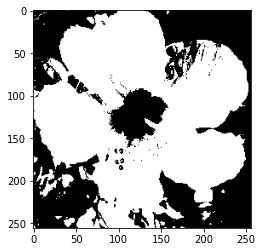

In [11]:
#Exercice 7

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import time

A = np.loadtxt("image_originale.txt", dtype='int', delimiter=',', skiprows=0, usecols=None)
print("Dimension : ",np.shape(A))

def getHopt(A):
    vecth = np.ndarray.flatten(A)
    vecthtri = np.sort(vecth)
    size = np.size(A)
    hopt = 0
    maxVarInter = 0
    
    for i in range(size):
        h = vecthtri[i]
        hIndex = np.searchsorted(vecthtri, h)
        #print(h, " ", vecthtri[hIndex-1:hIndex+1])
        Ainf = vecthtri[:hIndex]
        Asup = vecthtri[hIndex:]

        #Pour empêcher les warnings en cas de division par 0
        meanInf = 0
        if len(Ainf) != 0:
            meanInf = np.mean(Ainf)
        meanSup = 0
        if len(Asup) != 0:
            meanSup = np.mean(Asup)
            
        varInter = (len(Ainf)/size) * (len(Asup)/size) * (meanInf - meanSup)**2
        if varInter > maxVarInter:
            hopt = h
            maxVarInter = varInter
            
    return hopt


def noirEtBlanc(A, h):
    B = np.copy(A)
    for i in range(np.shape(B)[0]):
        for j in range(np.shape(B)[1]):
            if (B[i][j] < h):
                B[i][j] = 0
            else:
                B[i][j] = 1
    return B

hopt = getHopt(A)
print("hopt : ",hopt)
B = noirEtBlanc(A,hopt)
plt.imshow(B)
plt.gray()
plt.show()